In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys

In [4]:
sys.path.append('../../src/')

In [67]:
from WLNM import PaletteWL

In [68]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

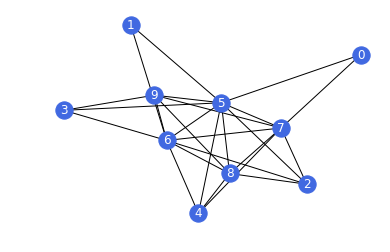

In [69]:
g = nx.barabasi_albert_graph(10,5)
nx.draw_networkx(g, node_color='royalblue', font_color='w')
plt.axis('off')
plt.show()

In [70]:
wl = PaletteWL(g)

In [71]:
train, test, val = wl.dataset(val_ratio=0.2)

In [72]:
y_train, x_train = train

In [73]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0])

In [74]:
x_train

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

In [75]:
x_train.shape

(30, 80)

In [76]:
y_val, x_val = val

In [77]:
y_val.shape

(10,)

In [78]:
x_val.shape

(10, 80)

# larger graph

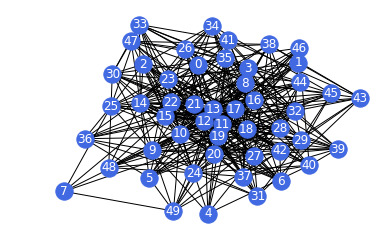

In [79]:

g = nx.barabasi_albert_graph(50,10)
nx.draw_networkx(g, node_color='royalblue', font_color='w')
plt.axis('off')
plt.show()

In [80]:
wl = PaletteWL(g)
train, test, val = wl.dataset()

In [81]:
y_train, x_train = train

In [82]:
y_train.shape

(640,)

In [83]:
x_train.shape

(640, 80)

In [84]:
y_test, x_test = test

In [85]:
y_test.shape

(160,)

In [86]:
y_val, x_val = val

In [87]:
y_val.shape

(0,)

In [88]:
x_val.shape

(0,)

## Profiling

In [89]:
import cProfile

In [90]:
cProfile.run("""
wl = PaletteWL(g)
train, test, val = wl.dataset()
""")

         7110569 function calls in 8.683 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    9.554    9.554 <string>:2(<module>)
   179860    1.787    0.000    1.787    0.000 WLNM.py:100(<listcomp>)
   179860    0.741    0.000    0.876    0.000 WLNM.py:103(<listcomp>)
    18786    0.249    0.000    1.501    0.000 WLNM.py:106(real_to_colors)
        1    0.000    0.000    0.000    0.000 WLNM.py:12(__init__)
      800    0.037    0.000    9.166    0.011 WLNM.py:129(WLgraphLab)
    17986    0.117    0.000    6.987    0.000 WLNM.py:139(<listcomp>)
      800    0.001    0.000    0.001    0.000 WLNM.py:147(<listcomp>)
      800    0.015    0.000    0.375    0.000 WLNM.py:150(adj_mat_subgraph)
        1    0.008    0.008    9.553    9.553 WLNM.py:163(dataset)
        1    0.000    0.000    0.000    0.000 WLNM.py:190(<listcomp>)
        1    0.000    0.000    0.000    0.000 WLNM.py:191(<listcomp>)
       

In [91]:
# larger
g = nx.barabasi_albert_graph(200,10)

In [92]:
cProfile.run("""
wl = PaletteWL(g)
train, test, val = wl.dataset()
""")

         37773695 function calls in 35.506 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001   37.437   37.437 <string>:2(<module>)
   544360    5.420    0.000    5.420    0.000 WLNM.py:100(<listcomp>)
   544360    3.233    0.000    3.525    0.000 WLNM.py:103(<listcomp>)
    58236    0.772    0.000    4.709    0.000 WLNM.py:106(real_to_colors)
        1    0.000    0.000    0.000    0.000 WLNM.py:12(__init__)
     3800    0.124    0.000   29.732    0.008 WLNM.py:129(WLgraphLab)
    54436    0.370    0.000   21.575    0.000 WLNM.py:139(<listcomp>)
     3800    0.004    0.000    0.004    0.000 WLNM.py:147(<listcomp>)
     3800    0.083    0.000    7.572    0.002 WLNM.py:150(adj_mat_subgraph)
        1    0.111    0.111   37.436   37.436 WLNM.py:163(dataset)
        1    0.000    0.000    0.000    0.000 WLNM.py:190(<listcomp>)
        1    0.000    0.000    0.000    0.000 WLNM.py:191(<listcomp>)
     

In [93]:
y_train, x_train = train

In [94]:
y_train.shape

(3040,)

In [95]:
x_train.shape

(3040, 80)